# DIABETES DATASET

Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene diabetes, basándose en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estos casos de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia indígena Pima. A partir del conjunto de datos en el archivo (.csv) podemos encontrar varias variables, algunas de ellas son independientes (varias variables predictoras médicas) y solo una variable dependiente objetivo (Resultado).

In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.DataPreparer import DataPreparer
from src.FormalContext import FormalContext
from src.OtherModels import *
from src import FCADecisionTree as FCADtree
import pandas as pd

DATA_CSV_FILE_PATH = 'C:\\Users\\Focus\\Desktop\\TFG\\TFG\\fca-decision-tree-classifier\\datasets\\real_datasets\\diabetes.csv'
TREES_MAX_DEPTH = 8

df = pd.read_csv(DATA_CSV_FILE_PATH)
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Prueba inicial del árbol básico c4.5, obtención de sus umbrales

In [4]:
from src.DecisionTreeC45 import DecisionTreeC45
from sklearn.model_selection import train_test_split

data = df.copy()
taget_column = -1

X = data.iloc[:, :-1]  # Todas las columnas excepto la última
y = data.iloc[:, -1]   # La última columna

# Convertir X a una lista de listas y y a una lista
X_list = X.values.tolist()
y_list = y.values.tolist()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión C4.5
attribute_names = X.columns.tolist()

decision_tree_c45 = DecisionTreeC45(attribute_names=attribute_names, max_depth=TREES_MAX_DEPTH)
decision_tree_c45.train_tree(X_train, y_train)


predictions_treec45 = decision_tree_c45.classify_instances(X_test)

decision_tree_c45.evaluation_metrics(y_test, predictions_treec45, average='macro') 
decision_tree_c45.print_tree_structure()

# Obtener los umbrales de los atributos continuos
thresholds = decision_tree_c45.get_thresholds()

print("Umbrales de los atributos continuos:", thresholds)

Accuracy: 0.7467532467532467
Precision: 0.7619047619047619
Recall: 0.6696969696969697
F1 Score: 0.6783935742971887
Confusion Matrix:
[[93  6]
 [33 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        99
           1       0.79      0.40      0.53        55

    accuracy                           0.75       154
   macro avg       0.76      0.67      0.68       154
weighted avg       0.76      0.75      0.72       154

Attribute: Glucose <= 166.5
  Attribute: Pregnancies <= 13.5
    Attribute: BMI <= 62.199999999999996
      Attribute: DiabetesPedigreeFunction <= 2.0345
        Attribute: BMI <= 48.099999999999994
          Attribute: Insulin <= 572.5
            Attribute: Glucose <= 154.5
              Attribute: BMI <= 26.35
                Decision: 0
                Decision: 0
              Attribute: Pregnancies <= 0.5
                Decision: 0
                Decision: 1
            Decision: 1
   

# Preparado de los datos, utilización de los mismos umbrales del C4.5

In [5]:
data_preparer = DataPreparer()
data_preparer.prepare_csvfile_data(
    file_path=DATA_CSV_FILE_PATH,
    discretizing_thresholds=thresholds  # Pasar los umbrales obtenidos del modelo C4.5
)

X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized()
labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

objects = list(labeled_train_data.index)
properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
num_objects = len(objects)
num_properties = len(properties)

print(f"Number of Objects: {num_objects}")
print(f"Number of Properties-Attributes: {num_properties}")

labeled_train_data.info()

Number of Objects: 614
Number of Properties-Attributes: 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies_0               614 non-null    float64
 1   Pregnancies_1               614 non-null    float64
 2   Pregnancies_2               614 non-null    float64
 3   Pregnancies_3               614 non-null    float64
 4   Glucose_0                   614 non-null    float64
 5   Glucose_1                   614 non-null    float64
 6   Glucose_2                   614 non-null    float64
 7   BloodPressure_0             614 non-null    float64
 8   BloodPressure_1             614 non-null    float64
 9   SkinThickness_0             614 non-null    float64
 10  SkinThickness_1             614 non-null    float64
 11  Insulin_0                   614 non-null    float64
 12  Insulin_1                   614 n

# Computación del contexto formal y prueba del árbol FCA:

Tamaño máximo del contexto: 15964
Tiempo de ejecución para el retículo: 11.85 segundos

Finalizando Algoritmo:
Número de conceptos formales: 2207

Vector a clasificar:  ['Pregnancies_2', 'Glucose_0', 'BloodPressure_0', 'SkinThickness_1', 'Insulin_0', 'BMI_1', 'DiabetesPedigreeFunction_1', 'Age_0']
└──Nivel 0: Nodo actual (Intent: [], Label: ROOT), Mejor coincidencia (Intent: [2])
Resultado final: Nodo (Intent: [2], Label: 1)

Vector a clasificar:  ['Pregnancies_1', 'Glucose_0', 'BloodPressure_1', 'SkinThickness_1', 'Insulin_0', 'BMI_1', 'DiabetesPedigreeFunction_0', 'Age_0']
└──Nivel 0: Nodo actual (Intent: [], Label: ROOT), Mejor coincidencia (Intent: [1])
Resultado final: Nodo (Intent: [1], Label: 1)

Vector a clasificar:  ['Pregnancies_1', 'Glucose_0', 'BloodPressure_0', 'SkinThickness_0', 'Insulin_0', 'BMI_1', 'DiabetesPedigreeFunction_0', 'Age_0']
└──Nivel 0: Nodo actual (Intent: [], Label: ROOT), Mejor coincidencia (Intent: [1])
Resultado final: Nodo (Intent: [1], Label: 1)

Vect

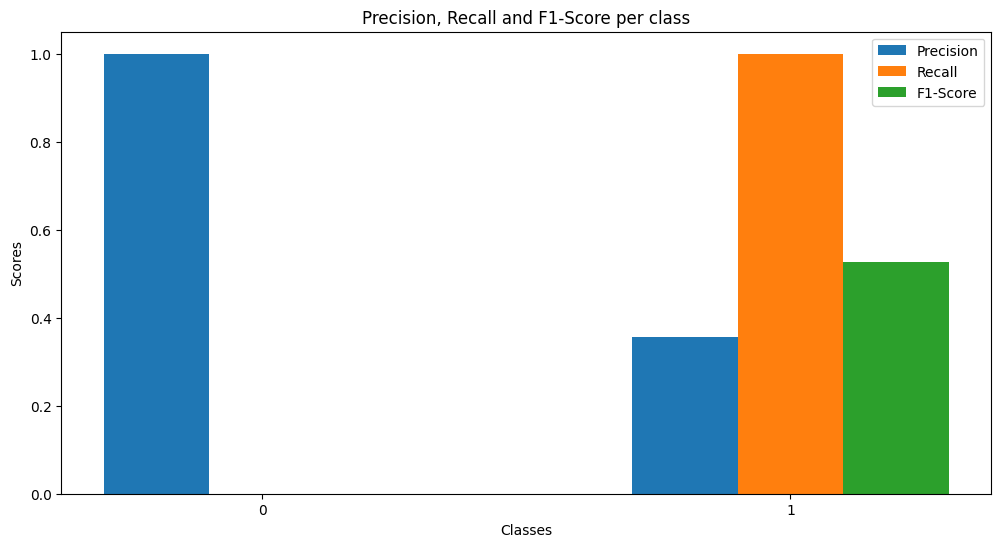

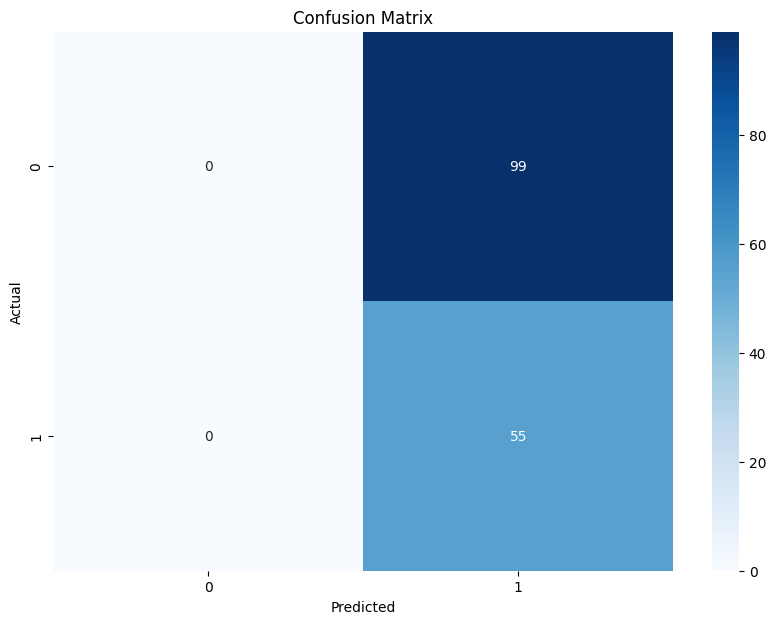

Execution Time: 0.2791707515716553 seconds
--------------------------------------------------
└── [0 - class-label: ROOT]
│   └── [1 - class-label: 1]
│   └── [283 - class-label: 1]
│   └── [689 - class-label: 1]
│   └── [1374 - class-label: 1]
│   └── [1751 - class-label: 1]
│   └── [1890 - class-label: 1]
│   └── [1972 - class-label: 1]
│   └── [2071 - class-label: 1]
│   └── [2119 - class-label: 1]
│   └── [2154 - class-label: 1]
│   └── [2189 - class-label: 1]
│   └── [2193 - class-label: 1]
│   └── [2201 - class-label: 1]
│   └── [2203 - class-label: 1]
│   └── [2206 - class-label: 1]
{'Tree Depth': 1, 'Total Nodes': 16, 'Leaf Nodes': 15, 'Average inmediate_subconcepts per Node': 0.5}
{'Accuracy': 0.35714285714285715, 'Precision': {0: 1.0, 1: 0.35714285714285715}, 'Recall': {0: 0.0, 1: 1.0}, 'F1-Score': {0: 0.0, 1: 0.5263157894736842}, 'Confusion Matrix': array([[ 0, 99],
       [ 0, 55]], dtype=int64)}


In [6]:
formal_context = FormalContext(labeled_data=labeled_train_data)
max_context_size = num_objects * num_properties
print(f"Tamaño máximo del contexto: {formal_context.max_context_size}")  
formal_context.build_lattice(debug=True, compute_parents_childs=True)

print("\nFinalizando Algoritmo:")
print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))

start_time = time.time()
decision_treeFCA = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=TREES_MAX_DEPTH)
results = decision_treeFCA.evaluate(X_test, y_test, debug=True, plot_results=True)
end_time = time.time()

# Imprimir el tiempo de ejecución
print(f"Execution Time: {end_time - start_time} seconds")
print("--------------------------------------------------")
#decision_treeFCA.print_tree_complete()
decision_treeFCA.print_tree_logic() 
complexity_info = decision_treeFCA.display_tree_complexity()
print(complexity_info)
print(results) 

# Prueba del árbol básico ID3

In [7]:
# Evaluación del modelo DecisionTreeID3
from src.DecisionTreeID3 import DecisionTreeID3

decision_treeid3 = DecisionTreeID3(attribute_names=properties, max_depth=TREES_MAX_DEPTH)

decision_treeid3.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

predictions_treeid3 = decision_treeid3.classify_instances(X_test.values.tolist())

decision_treeid3.evaluation_metrics(y_test, predictions_treeid3, average='macro')
decision_treeid3.print_tree_structure()


Accuracy: 0.7142857142857143
Precision: 0.724527049452373
Recall: 0.6242424242424243
F1 Score: 0.6222965440356745
Confusion Matrix:
[[93  6]
 [38 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        99
           1       0.74      0.31      0.44        55

    accuracy                           0.71       154
   macro avg       0.72      0.62      0.62       154
weighted avg       0.72      0.71      0.68       154

Attribute: Glucose_0
Category: 0.0
  Attribute: Glucose_1
  Category: 0.0
    Attribute: SkinThickness_0
    Category: 0.0
      Attribute: Insulin_4
      Category: 0.0
        Decision: 1
      Category: 1.0
        Decision: 0
    Category: 1.0
      Attribute: BloodPressure_0
      Category: 0.0
        Attribute: DiabetesPedigreeFunction_2
        Category: 0.0
          Attribute: Age_0
          Category: 0.0
            Decision: 0
          Category: 1.0
            Decision: 1
       

Prueba de cross-validación:

In [8]:
decision_treeid3.test_CV(X, y, random_state=42, attribute_names=attribute_names, k=5, max_depth=4)

Exactitud media: 0.6055
Precisión media: 0.4833
Recall media: 0.4930
F1-Score media: 0.4544
Desviación estándar de la Exactitud: 0.0300


# Prueba adicional de los demás modelos

Prueba con preprocesamiento, discretizados y binarizados:

In [9]:
CROSS_VALIDATION = 1
METRICS_AVERAGE = 'weighted'

tryOtherModels(X_train, X_test, y_train, y_test, CROSS_VALIDATION, selected_average=METRICS_AVERAGE)

Evaluating model: Logistic Regression
Classifier: OneVsRestClassifier
Accuracy: 0.7597402597402597
Precision: 0.7678571428571429
Recall: 0.7597402597402597
F1 Score: 0.7378754192259864
Confusion Matrix:
[[93  6]
 [31 24]]
Execution Time: 0.019009113311767578 seconds
--------------------------------------------------
Evaluating model: SVM
Classifier: SVC
Accuracy: 0.7467532467532467
Precision: 0.7551020408163265
Recall: 0.7467532467532467
F1 Score: 0.7207573149741825
Confusion Matrix:
[[93  6]
 [33 22]]
Execution Time: 0.02660226821899414 seconds
--------------------------------------------------
Evaluating model: Decision Tree
Classifier: DecisionTreeClassifier
Accuracy: 0.7142857142857143
Precision: 0.7040930084408346
Recall: 0.7142857142857143
F1 Score: 0.7006505127403914
Confusion Matrix:
[[85 14]
 [30 25]]
Execution Time: 0.008001327514648438 seconds
--------------------------------------------------
Evaluating model: K-Nearest Neighbors
Classifier: KNeighborsClassifier
Accuracy: 0

Prueba sin preprocesamiento, con los datos originales

In [10]:
CROSS_VALIDATION = 1
METRICS_AVERAGE = 'weighted'

data = df.copy()
taget_column = -1

X = data.iloc[:, :-1]  #
y = data.iloc[:, -1]   

X_list = X.values.tolist()
y_list = y.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

tryOtherModels(X_train, X_test, y_train, y_test, CROSS_VALIDATION, selected_average=METRICS_AVERAGE)

Evaluating model: Logistic Regression
Classifier: OneVsRestClassifier
Accuracy: 0.7467532467532467
Precision: 0.7501539408866995
Recall: 0.7467532467532467
F1 Score: 0.7481668773704172
Confusion Matrix:
[[78 21]
 [18 37]]
Execution Time: 0.02954268455505371 seconds
--------------------------------------------------
Evaluating model: SVM
Classifier: SVC
Accuracy: 0.7662337662337663
Precision: 0.7613360869174822
Recall: 0.7662337662337663
F1 Score: 0.7586005830903791
Confusion Matrix:
[[87 12]
 [24 31]]
Execution Time: 0.0265347957611084 seconds
--------------------------------------------------
Evaluating model: Decision Tree
Classifier: DecisionTreeClassifier
Accuracy: 0.7532467532467533
Precision: 0.7605953010500869
Recall: 0.7532467532467533
F1 Score: 0.7557727832512315
Confusion Matrix:
[[77 22]
 [16 39]]
Execution Time: 0.010511159896850586 seconds
--------------------------------------------------
Evaluating model: K-Nearest Neighbors
Classifier: KNeighborsClassifier
Accuracy: 0.6

# TEST ESTADÍSTICO DEL FCATREE CON EL ID3 Y  EL C4.5

## Parámetros globales:

In [11]:
CLASSES_THRESHOLD = 0.6 # % de similitud de clases para la poda en el FCATREE
debug=False
max_depth = 5
random_state = 42
test_size = 0.3


OTHER_TREE_MODEL = "ID3" #primera prueba con el ID3

## Definición de funciones

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
from mlxtend.evaluate import mcnemar_table, mcnemar
from scipy.stats import t as t_dist
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# test t de paridad
def paired_t_test(p):
        p_hat = np.mean(p)
        n = len(p)
        den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
        t = (p_hat * (n**(1/2))) / den
        
        p_value = t_dist.sf(t, n-1)*2
        
        return t, p_value

# PRUEBA DE TEST Z PARA DOS PORPORCIONES
def two_proportions_test(y_true, y_pred1, y_pred2):
    success_a = np.sum(y_pred1 == y_true)
    success_b = np.sum(y_pred2 == y_true)
    n_a = len(y_true)
    n_b = len(y_true)
    
    prop_a = success_a / n_a
    prop_b = success_b / n_b
    
    var_a = (prop_a * (1 - prop_a)) / n_a
    var_b = (prop_b * (1 - prop_b)) / n_b
    
    if var_a + var_b == 0:
        return 0, 1  # No hay diferencia significativa si no hay variabilidad
    
    z = (prop_a - prop_b) / np.sqrt(var_a + var_b)
    p_value = stats.norm.sf(abs(z)) * 2  # Test de dos colas
    
    return z, p_value

# PRUEBA DE MCNEMAR
def mcnemar_test(y_true, y_pred1, y_pred2):
    table = mcnemar_table(y_target=np.array(y_true), 
                          y_model1=np.array(y_pred1), 
                          y_model2=np.array(y_pred2))
    chi2, p = mcnemar(ary=table, corrected=True)
    return chi2, p

# PRUEBA T PAREADA
def resampled_paired_ttest(data_preparer, n_tests=30, test_size=None, max_depth=None):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD, debug
    p_ = []
    rng = np.random.RandomState(random_state)
    for i in range(n_tests):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(random_state=randint, test_size=test_size)

        # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
        # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

        
        accuracy = accuracy_score(y_test, fca_model.classify_instances(X_test))
        if(debug):
            print("FCAMODEL: ", accuracy)
        accuracy = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        if(debug):
            print("OTHER: ", accuracy)
        

        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_.append(acc1 - acc2)

    t_stat, p_value = paired_t_test(p_)
    return t_stat, p_value



# CV DE 5 ITERACIONES DE 2 PLIEGUES
def cross_val_5x2_test(data_preparer, test_size, max_depth):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD,  debug

    def five_two_statistic(p1, p2):
        p1 = np.array(p1)
        p2 = np.array(p2)
        p_hat = (p1 + p2) / 2
        s = (p1 - p_hat)**2 + (p2 - p_hat)**2
        t = p1[0] / np.sqrt(1/5. * sum(s))
        
        p_value = t_dist.sf(t, 5)*2
        
        return t, p_value

    p_1 = []
    p_2 = []

    rng = np.random.RandomState(42)
    for i in range(5):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=randint, test_size=test_size)

        # p1 evaluacion de train-test
            # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())


        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_1.append(acc1 - acc2)


        # p2 evaluacion de test-train
            # para el modelo FCA
        labeled_train_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_test.values.tolist(), data_preparer.y_test.tolist())

        acc1 = accuracy_score(y_train, fca_model.classify_instances(X_train))
        acc2 = accuracy_score(y_train, other_tree_model.classify_instances(X_train.values.tolist()))
        p_2.append(acc1 - acc2)

    t, p = five_two_statistic(p_1, p_2)
    return t, p


def test_statistical(random_state, test_size, max_depth, data_preparer):
    X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=random_state, test_size=test_size)

    print("#############################################################################")
    if(debug):
        print("\n\n\ESTRUCTURAS de datos de X e Y:\n", X, y, X_train, X_test, y_train, y_test)

    # Inicializar y proabr el modelo FCA
    labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    formal_context = FormalContext(labeled_data=labeled_train_data)
    formal_context.build_lattice(debug=False, compute_parents_childs=True)
    print("\nFinalizando Algoritmo del retículo:")
    print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))
    fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
    
    if(debug):
        fca_model.print_tree_logic()
        fca_model.print_tree_structure()

    fca_predicted_labels = fca_model.classify_instances(X_test)

    # Inicializar y probar el otro modelo
    properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
    
    if(OTHER_TREE_MODEL == "C45"):
        other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
    else:
        other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)

    other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())
    predictions_other_tree= other_tree_model.classify_instances(X_test.values.tolist())

    # Two Proportions Test
    z, p_proportions = two_proportions_test(y_test , fca_predicted_labels, predictions_other_tree)
    #print("two_proportions_test:", z, p_proportions)

     # McNemar’s Test
    chi2_mcnemar, p_mcnemar = mcnemar_test(y_test, fca_predicted_labels, predictions_other_tree)
    #print("mcnemar_test", chi2_mcnemar, p_mcnemar)
    
    # Resampled Paired t-test
    t_resampled, p_resampled = resampled_paired_ttest(data_preparer, n_tests=30, test_size=test_size, max_depth=max_depth)
    #print("resampled_paired_ttest", t_resampled, p_resampled)

    
    # 5x2 Cross-Validation Test
    t_5x2, p_5x2 = cross_val_5x2_test(data_preparer, test_size, max_depth)
    #print("cross_val_5x2_test", t_5x2, p_5x2)
    
    results = {
        "Two Proportions Test": (z, p_proportions),
        "McNemars Test": (chi2_mcnemar, p_mcnemar),
        "Resampled Paired t-test": (t_resampled, p_resampled),
        "5x2 Cross-Validation Test": (t_5x2, p_5x2)
    }
    
    return results


print(f"Parámetros de configuración:")
print(f"Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): {CLASSES_THRESHOLD}")
print(f"Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {thresholds}")
print(f"Profundidad máxima del árbol (max_depth): {max_depth}")
print(f"Estado aleatorio (random_state): {random_state}")
print(f"Tamaño del conjunto de prueba (test_size): {test_size}")

Parámetros de configuración:
Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): 0.6
Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {1: [166.5, 154.5], 0: [13.5, 0.5, 2.5], 5: [62.199999999999996, 48.099999999999994, 26.35], 6: [2.0345, 1.3370000000000002, 0.27649999999999997], 4: [572.5, 230.0, 643.5, 307.5], 7: [66.5], 3: [25.5], 2: [71.0]}
Profundidad máxima del árbol (max_depth): 5
Estado aleatorio (random_state): 42
Tamaño del conjunto de prueba (test_size): 0.3


## Prueba con el ID3

In [13]:
# Comparación estadística
# Entre FCADecisionTree y DecisionTreeID3
results_with_id3 = test_statistical(random_state, test_size, max_depth, data_preparer)

print("\nResultados entre y and DecisionTreeID3:")
for test_name, (statistic, p_value) in results_with_id3.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################

Finalizando Algoritmo del retículo:
Número de conceptos formales: 2012

Resultados entre y and DecisionTreeID3:
Two Proportions Test: Statistic = -8.884242029680099, p-value = 6.435804158851143e-19
McNemars Test: Statistic = 40.26063829787234, p-value = 2.2224184448055965e-10
Resampled Paired t-test: Statistic = -51.96340553103913, p-value = 2.0
5x2 Cross-Validation Test: Statistic = -11.649551168544404, p-value = 1.99991814069447


## Prueba con el C4.5

In [14]:
OTHER_TREE_MODEL = "C45"

# Comparación estadística
# Entre FCADecisionTree y DecisionTreeC45
results_with_c45 = test_statistical(random_state, test_size, max_depth, data_preparer)
print("\nResults between FCADecisionTree and DecisionTreeC45:")
for test_name, (statistic, p_value) in results_with_c45.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################

Finalizando Algoritmo del retículo:
Número de conceptos formales: 2012

Results between FCADecisionTree and DecisionTreeC45:
Two Proportions Test: Statistic = -8.64313624271815, p-value = 5.4690639585394825e-18
McNemars Test: Statistic = 36.125, p-value = 1.8505741373867396e-09
Resampled Paired t-test: Statistic = -50.319542307419376, p-value = 2.0
5x2 Cross-Validation Test: Statistic = -7.487124524159673, p-value = 1.9993284038689128
